## 1. Introduction

## Purpose of this Project

- The primary objective of this project is to construct a robust customer habit model that can accurately predict the likelihood of current clients making additional purchases from the company in the future. By leveraging this strategic approach, the organization stands to benefit from the ability to initiate more targeted marketing initiatives that will, in turn, facilitate an increase in overall revenue growth, customer retention, and sales practices.

- To this end, the proposed methodology will entail a rigorous analytical process aimed at identifying the key factors that drive customer purchasing behavior. Once these determinants are identified, they will be used to develop a predictive model that will enable the organization to forecast the likelihood of future purchases by existing customers.

__Overall,__ the successful implementation of this project has the potential to significantly enhance the company's customer retention and sales strategies, thereby positioning it favorably in an increasingly competitive marketplace.

## Objectives of the Project

- In order to improve the effectiveness of a machine learning model, it is essential to __identify key performance indicator__ from a range of attributes. This approach will enable the development of a statistical and machine learning model, which can accurately forecast a customer's inclination to purchase additional items.

- To accomplish this, it is necessary to __utilize sophisticated statistical analysis and machine learning techniques__ to create a model that is both powerful and precise. This model will ultimately provide valuable insights into customer behavior and preferences, allowing businesses to proactively build stronger customer relationships and encourage brand loyalty through personalized benefits and incentives.

__In conclusion__, by combining data-driven insights with cutting-edge machine learning technology, businesses can enhance customer retention and optimize sales practices, resulting in improved profitability and long-term success.

## 2. Data Acquisition and Loading
The customer dataset, comprising demographic information, buying behaviors, and the decision to purchase a new product (TARGET), will be imported into the Jupyter Notebook environment from a Github repository. The dataset, provided for analysis purposes, shall be scrutinized to identify patterns and insights that will inform strategic business decisions. The loading process shall be executed with utmost precision to ensure that the data integrity is maintained.

In [91]:
import pandas as pd
import numpy as np

In [92]:
# Read the dataset from the given URL into a DataFrame named 'df'.
df = pd.read_csv('https://raw.githubusercontent.com/Rajendramahesh/Analytical-programing-datasets/main/Project%204%20DATA.csv')
df

,TARGET,loyalty,ID,age,city,prod_A,type_A,type_B,prod_B,turnover_A,turnover_B,age_P,lor_M
0,Y,99,77,66,2,0,0,0,0,333.561114,264.721010,66,3
1,Y,1,159,45,2,1,3,3,1,394.735699,284.904978,45,39
2,Y,1,220,42,2,1,3,6,1,342.180990,1175.589721,42,27
3,Y,99,303,31,2,0,0,0,0,453.757916,242.341754,31,3
4,Y,99,306,62,2,0,0,0,0,384.577469,287.008370,62,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14011,Y,99,151601,30,2,0,0,0,0,386.434278,284.309508,30,3
14012,Y,1,151634,27,2,1,3,3,1,376.842591,266.993794,27,27
14013,Y,99,151679,26,2,0,0,0,0,434.805703,284.629361,26,3
14014,Y,1,151804,75,2,1,3,3,1,366.273857,270.573265,75,15


## 3. Data Exploration and Cleaning

#### Step-1:

__DataFrame creation:__ A pandas DataFrame will be created, including the TARGET variable, Age, loyalty level (Loyalty), length of customer relationship (LOR_m), and product purchase indicators (Prod_A, Prod_B).

In [93]:
# Make a dataset using a selected subset of the columns.
selected_coloums = ['TARGET','age','type_A','type_B','lor_M','prod_A','prod_B']
sub_df = df[selected_coloums]
sub_df

,TARGET,age,type_A,type_B,lor_M,prod_A,prod_B
0,Y,66,0,0,3,0,0
1,Y,45,3,3,39,1,1
2,Y,42,3,6,27,1,1
3,Y,31,0,0,3,0,0
4,Y,62,0,0,3,0,0
...,...,...,...,...,...,...,...
14011,Y,30,0,0,3,0,0
14012,Y,27,3,3,27,1,1
14013,Y,26,0,0,3,0,0
14014,Y,75,3,3,15,1,1


The reason we selected **prod_A**(previously purchased product A) and **prod_B** (previously purchased product B) is that a customer's past purchases of product_A and product_B can reveal their preferences and needs. If a new product shares features or is identical to Prod_A or Prod_B, customers who have already purchased those products may be more interested in the new product as well.

#### Step-2:

__TARGET Conversion:__ The TARGET variable will be converted from categorical (e.g., "N" or "Y") to numerical values (e.g., 0 for "N" and 1 for "Y") to be compatible with scikit-learn.

In [94]:
# Convert Y/N indications to binary values (1/0) in Target variable.
sub_df['TARGET'] = [ 1 if i.upper() == 'Y' else 0 for i in sub_df['TARGET']  ]
sub_df

<ipython-input-94-c10208d09851>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['TARGET'] = [ 1 if i.upper() == 'Y' else 0 for i in sub_df['TARGET']  ]


,TARGET,age,type_A,type_B,lor_M,prod_A,prod_B
0,1,66,0,0,3,0,0
1,1,45,3,3,39,1,1
2,1,42,3,6,27,1,1
3,1,31,0,0,3,0,0
4,1,62,0,0,3,0,0
...,...,...,...,...,...,...,...
14011,1,30,0,0,3,0,0
14012,1,27,3,3,27,1,1
14013,1,26,0,0,3,0,0
14014,1,75,3,3,15,1,1


- Machine learning algorithms especially linear models,work best with numerical features.So converting categorical variables in Target column(Y/N) to binary values(1/0) allows them to be directly used in the model and a single binary feature (1/0) for (Y/N) is more concise than the original text.

#### Step-3:

__Exploratory Data Analysis (EDA):__

In [95]:
# display dataframe
sub_df

,TARGET,age,type_A,type_B,lor_M,prod_A,prod_B
0,1,66,0,0,3,0,0
1,1,45,3,3,39,1,1
2,1,42,3,6,27,1,1
3,1,31,0,0,3,0,0
4,1,62,0,0,3,0,0
...,...,...,...,...,...,...,...
14011,1,30,0,0,3,0,0
14012,1,27,3,3,27,1,1
14013,1,26,0,0,3,0,0
14014,1,75,3,3,15,1,1


In [96]:
# Information about dataframe.
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14016 entries, 0 to 14015
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   TARGET  14016 non-null  int64
 1   age     14016 non-null  int64
 2   type_A  14016 non-null  int64
 3   type_B  14016 non-null  int64
 4   lor_M   14016 non-null  int64
 5   prod_A  14016 non-null  int64
 6   prod_B  14016 non-null  int64
dtypes: int64(7)
memory usage: 766.6 KB


- The DataFrame contains 14,016 rows and 7 columns. All columns have non-null integer values.
- Columns include
  - TARGET (Categorical / Nominal)
  - age (Numerical / Discrete)
  - type_A and type_B (Categorical / Nominal)
    - **NOTE** : The value "0" in type_A and type_B indicates that the consumer did not purchase any products from A or B; it does not represent the actual type of products.
  - lor_M  (Numerical / Discrete)
  - prod_A and prod_B (Categorical / Nominal)

## Uni-variate Analysis

In [97]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

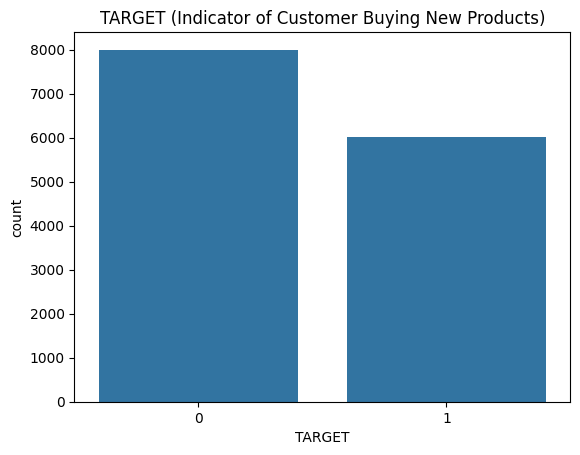

In [98]:
sns.countplot(x="TARGET", data=sub_df)
# Set title and axis labels
plt.title("TARGET (Indicator of Customer Buying New Products)")
plt.xlabel("TARGET")
plt.ylabel("count")
plt.show()

The dataset displays distributions for both customers who did not purchase a product and customers who purchased a new one. Approximately 6000 customers purchased new products, whereas approximately 8000 customers did not.which can be considered as good training dataset without being baised to single category.

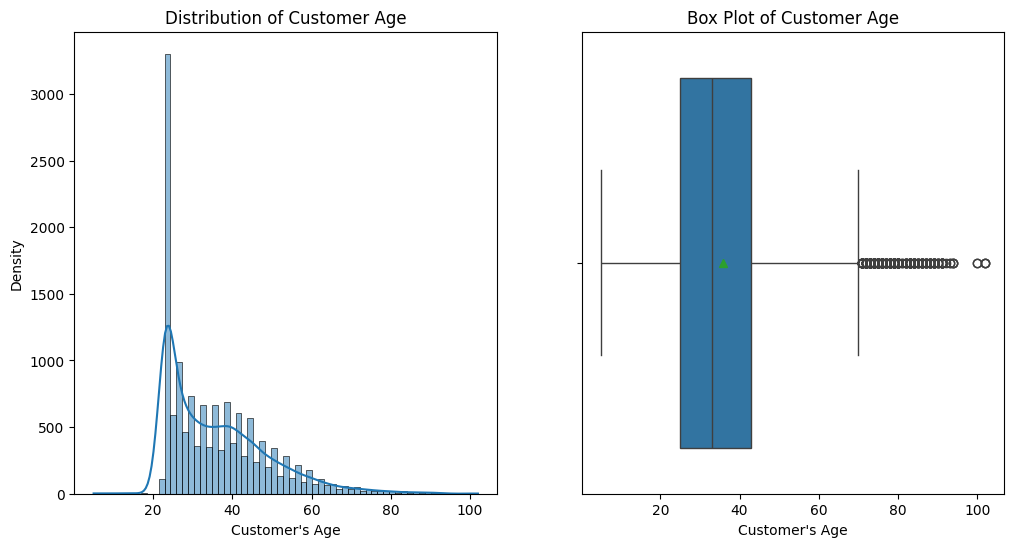

In [99]:
fig, axes = plt.subplots(1,2, figsize=(12, 6))

# Histogram of the age distribution
sns.histplot(data=sub_df, x="age", kde=True, ax = axes[0])
# Set title and axis labels
axes[0].set_title("Distribution of Customer Age")
axes[0].set_xlabel("Customer's Age")
axes[0].set_ylabel("Density")

# Box plot on the age distribution
sns.boxplot(data=sub_df, x="age", showmeans=True, ax = axes[1])
# Set title and axis labels
axes[1].set_title("Box Plot of Customer Age")
axes[1].set_xlabel("Customer's Age")



plt.show()

In [100]:
sub_df['age'].describe()

count    14016.000000
mean        35.882920
std         12.974634
min          5.000000
25%         25.000000
50%         33.000000
75%         43.000000
max        102.000000
Name: age, dtype: float64

- According to the above graphs, the majority of customers are in the 25 to 35 year-old range, with a mean age of 33 and  minimum and maximun age of 5 and 102 years respectively.

In [101]:
# Displays type_A, type_B values from sub_df where prod_A and prod_B has value 0
test1 = sub_df['type_A'].loc[sub_df['prod_A'] == 0]
print(test1.unique())
test2 = sub_df['type_B'].loc[sub_df['prod_B'] == 0]
print(test2.unique())

[0]
[0]


 - After careful examination of the dataset, we can conclude that type_A and type_B are only 0 when prod_A and prod_B are also 0. In other words, the value 0 in type_A and type_B does not represent the true type of the product; rather, it is equivalent to null.

In [102]:
# creating a subset of dataframe excluding value "0" in type_A and type_B.
droped_df = sub_df.loc[(sub_df['type_A'] != 0) & (sub_df['type_B'] != 0)]


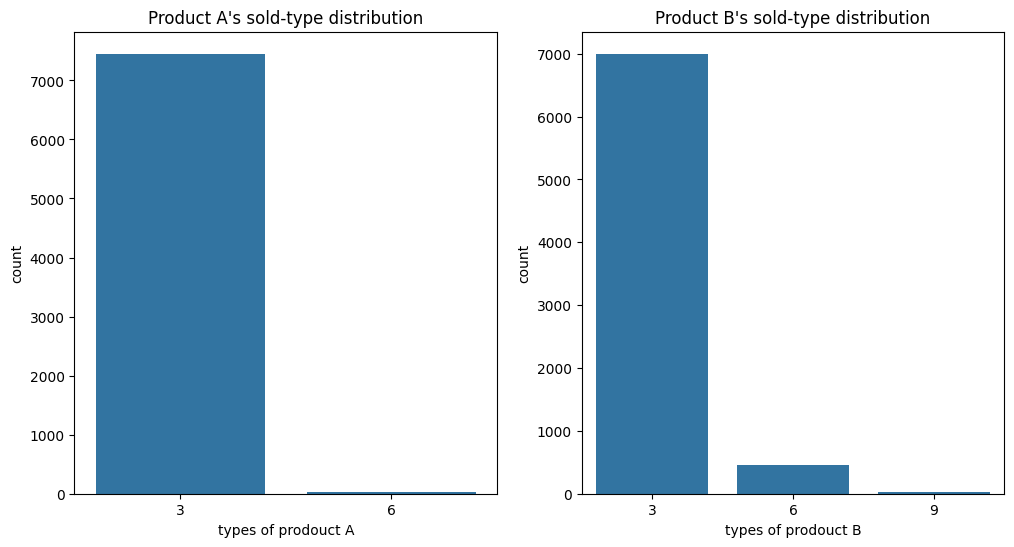

In [103]:


fig, ax = plt.subplots(1,2, figsize=(12, 6))
# Plouting count plot for type_A
sns.countplot(x="type_A", data=droped_df, ax = ax[0])
# Set title and axis labels
ax[0].set_title("Product A's sold-type distribution")
ax[0].set_xlabel("types of prodouct A")
ax[0].set_ylabel("count")

# Plouting count plot for type_B
sns.countplot(x="type_B", data=droped_df, ax = ax[1])
# Set title and axis labels
ax[1].set_title("Product B's sold-type distribution")
ax[1].set_xlabel("types of prodouct B")
ax[1].set_ylabel("count")

plt.show()

- The graphs mentioned above show the distribution of types that were sold in both products A and B. Based on these graphs, we can deduce that type 3 is the most popular product type in both of the product-A and product-B, type 6 is the least popular product-A and type 9 in product-B. In addition, product-B has a greater variety of types than product A.

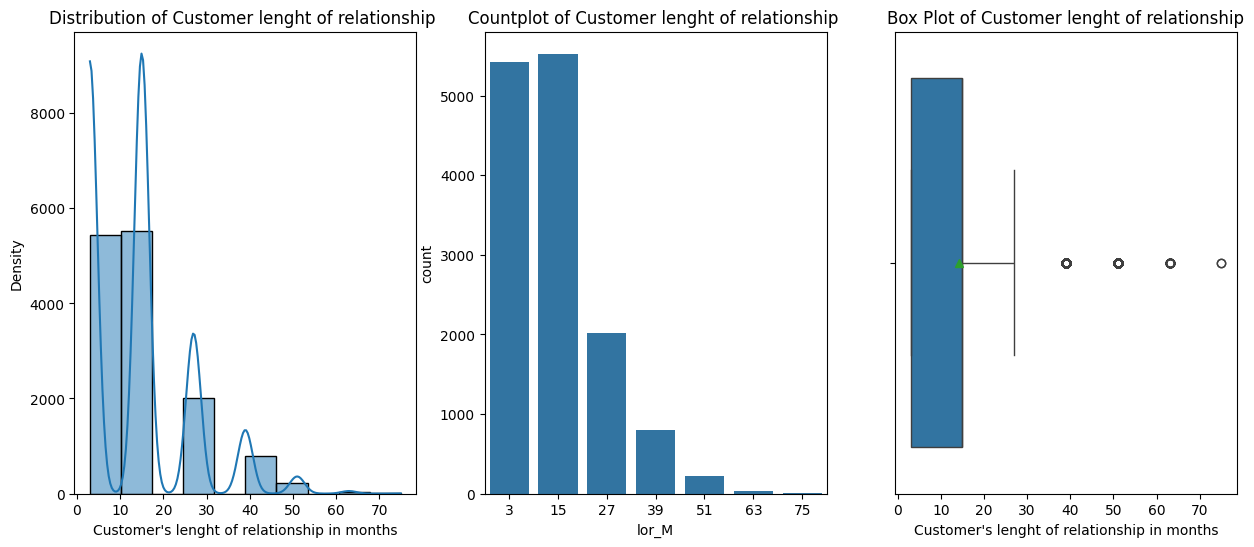

In [104]:
fig, ax = plt.subplots(1,3, figsize=(15, 6))

# Histogram of the lor_M  distribution
sns.histplot(data=sub_df, x="lor_M", kde=True,bins=10, ax = ax[0])
# Set title and axis labels
ax[0].set_title("Distribution of Customer lenght of relationship ")
ax[0].set_xlabel("Customer's lenght of relationship in months")
ax[0].set_ylabel("Density")

#countplot of the lor_M  distribution
sns.countplot(data=sub_df, x="lor_M", ax = ax[1])
ax[1].set_title("Countplot of Customer lenght of relationship ")

# Box plot on the lor_M  distribution
sns.boxplot(data=sub_df, x="lor_M", showmeans=True, ax = ax[2])
# Set title and axis labels
ax[2].set_title("Box Plot of Customer lenght of relationship")
ax[2].set_xlabel("Customer's lenght of relationship in months")



plt.show()

In [105]:
sub_df['lor_M'].describe()

count    14016.000000
mean        14.115582
std         11.582550
min          3.000000
25%          3.000000
50%         15.000000
75%         15.000000
max         75.000000
Name: lor_M, dtype: float64

- According to the above series of graphs and statistics, there are **more short-term customers** (about 5600) whose relationships with the company have lasted a **maximum of 15 months**, 2000 customers have lasted 27 months, and **very few have remained more than 51 months**.

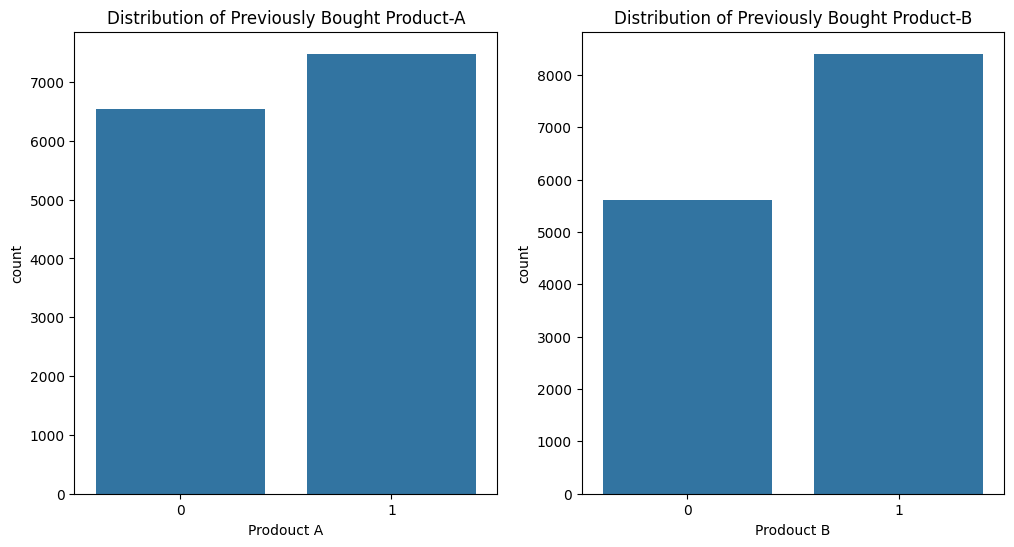

In [106]:
fig, ax = plt.subplots(1,2, figsize=(12, 6))
# plotting count plot for product_A
sns.countplot(x="prod_A", data=sub_df, ax = ax[0])
# Set title and axis labels
ax[0].set_title("Distribution of Previously Bought Product-A")
ax[0].set_xlabel("Prodouct A")
ax[0].set_ylabel("count")

# plotting count plot for product_B
sns.countplot(x="prod_B", data=sub_df, ax = ax[1])
# Set title and axis labels
ax[1].set_title("Distribution of Previously Bought Product-B")
ax[1].set_xlabel("Prodouct B")
ax[1].set_ylabel("count")

plt.show()

- When comparing the distribution of previously bought products A and B, there is an apparent disparity since **more customers have purchased product B** over product A.

## Bi-variate analysis

<Figure size 640x480 with 0 Axes>

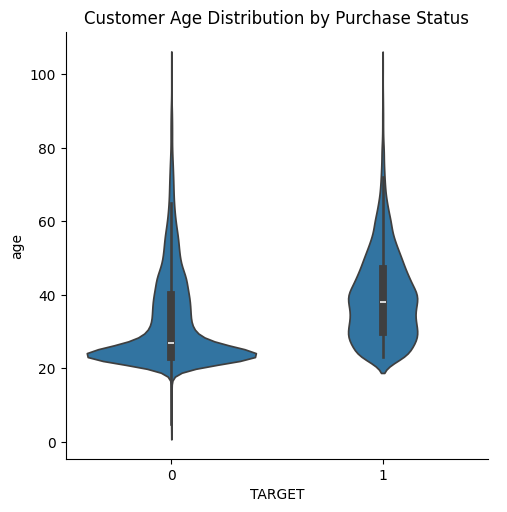

In [107]:
plt.figure(10)

# Plouting violin plot for target and age
sns.catplot(data=sub_df, x="TARGET", y="age",kind = "violin")

# Set title
plt.title("Customer Age Distribution by Purchase Status")
plt.show()

- The violin graph displays customer distributions by age and purchase status(whether or not they made a new product purchase).
- The graph's bigger portion indicates that there are more customers at that age range, leading us to conclude that there are more customers in the 23–25  age range approximately, who have not purchased a new product, and that a substantial portion of those who have bought are between the age range of 27 and 40 approximately.
- In conclusion, middle-aged consumers are more likely to purchase new products.


TARGET,0,1
type_A,,
3,5368,2084
6,16,14


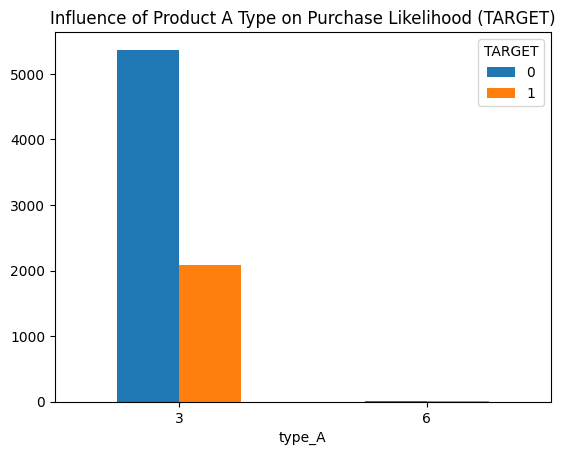

In [108]:

# Crosstab for type_A to TARGET
ctr1=pd.crosstab(index=droped_df['type_A'],columns=sub_df['TARGET'])

# Ploting bar graph for type_A to TARGET
ctr1.plot.bar(rot =0)

# Set title
plt.title("Influence of Product A Type on Purchase Likelihood (TARGET)")

ctr1

- The bar graph above illustrates how purchasing a new product is influenced by product type A.
- Only few customers who bought type 3 of product-A bought new product.

TARGET,0,1
type_B,,
3,4981,2020
6,377,74
9,26,4


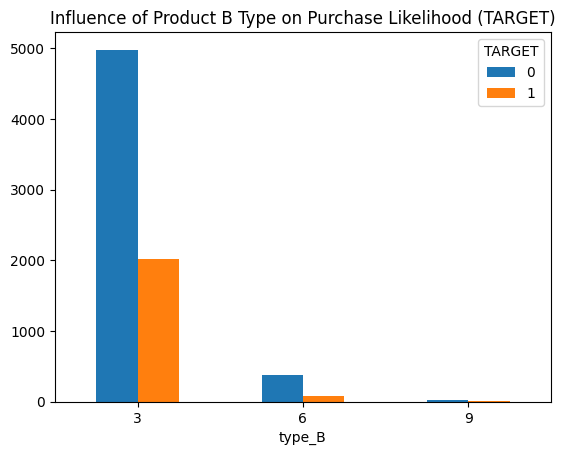

In [109]:
# Crosstab for type_B to TARGET
ctr2=pd.crosstab(index=droped_df['type_B'],columns=sub_df['TARGET'])

# Ploting bar graph for type_B to TARGET
ctr2.plot.bar(rot =0)

# Set title
plt.title("Influence of Product B Type on Purchase Likelihood (TARGET)")

ctr2

- The bar graph above illustrates how purchasing a new product is influenced by product type B.
- It is more likely that customers who bought type 3 of product-B bought new product, when compared to other types of product B.

- In summary, customers who purchased type 3 of products A and B are more, to purchase new products.

<Figure size 640x480 with 0 Axes>

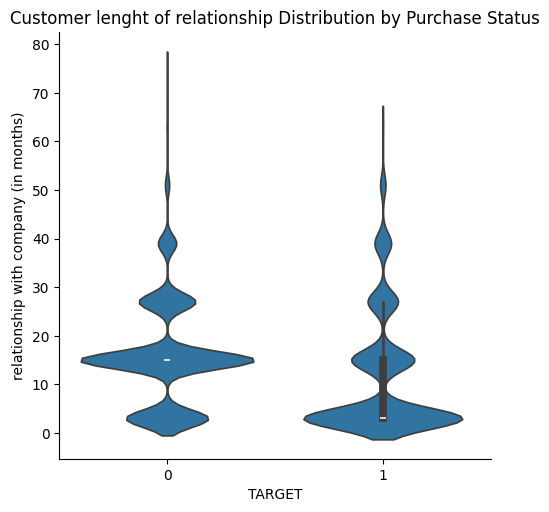

In [110]:
plt.figure(10)

# Plouting violin plot for target and age
sns.catplot(data=sub_df, x="TARGET", y="lor_M",kind = "violin")

# Set title
plt.title("Customer lenght of relationship Distribution by Purchase Status")
plt.ylabel("relationship with company (in months)")
plt.show()

- Customers who remain with the company for 5 to 8 months are more to purchase a new product.
- On the other hand, a significant portion of clients who stick with a company for longer than 15 months did not purchased new products.


TARGET     0     1
prod_A            
0       2616  3918
1       5384  2098
--------------------
TARGET     0     1
prod_B            
0       2042  3572
1       5958  2444


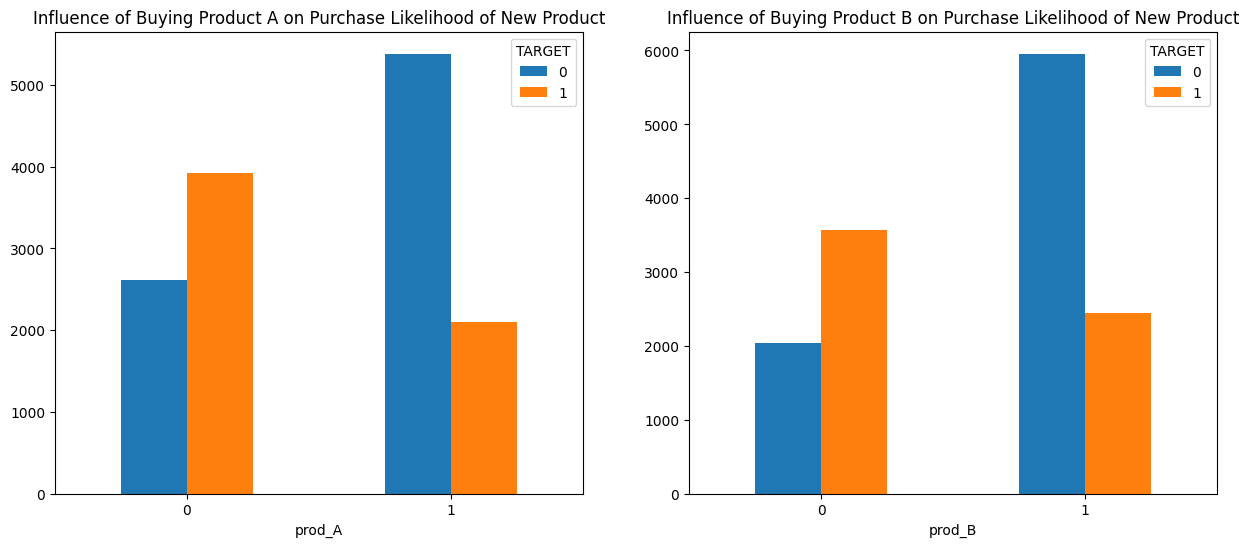

In [112]:
fig, ax = plt.subplots(1,2, figsize = (15, 6))

# Crosstab for Prod_A to TARGET
ctr_proda=pd.crosstab(index=sub_df['prod_A'],columns=sub_df['TARGET'])

# Ploting bar graph for Prod_A to TARGET
ctr_proda.plot.bar(rot =0, ax=ax[0])

# Set title
ax[0].set_title("Influence of Buying Product A on Purchase Likelihood of New Product")
#plt.title("Influence of Buying Product A on Purchase Likelihood of New Product")

# Crosstab for Prod_B to TARGET
ctr_prodb=pd.crosstab(index=sub_df['prod_B'],columns=sub_df['TARGET'])

# Ploting bar graph for Prod_B to TARGET
ctr_prodb.plot.bar(rot =0,ax= ax[1])

# Set title
ax[1].set_title("Influence of Buying Product B on Purchase Likelihood of New Product")

# Showing crosstab stats.
print(ctr_proda)
print('-'*20)
print(ctr_prodb)

plt.show()


- According to the right side graph (Influence of Buying Product A on Purchase Likelihood of New Product), the majority of customers who purchased product-A did not buy new products. The majority of customers who did not purchase product-A here bought new products.

- Based on the graph on the left (Influence of Purchasing Product B on Purchase Likelihood of New Product), most customers who bought product B did not purchase any new products. Most of the consumers who did not buy product B, purchased new products.

- As a conclusion, we can state that consumers are more likely to acquire a new product if they did not purchase product A or product B.

## 4. Dummy Variable Creation

Dummy variables are generated for Type_A and Type_B columns using pandas get_dummies method. This generates numerical representations of categorical data which is needed for scikit-learn models.

In [113]:

# Create dummy variables for Type_A and Type_B
df_T = pd.get_dummies(sub_df, columns=['type_A', 'type_B'], dtype=int)

In [114]:
df_T

,TARGET,age,lor_M,prod_A,prod_B,type_A_0,type_A_3,type_A_6,type_B_0,type_B_3,type_B_6,type_B_9
0,1,66,3,0,0,1,0,0,1,0,0,0
1,1,45,39,1,1,0,1,0,0,1,0,0
2,1,42,27,1,1,0,1,0,0,0,1,0
3,1,31,3,0,0,1,0,0,1,0,0,0
4,1,62,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14011,1,30,3,0,0,1,0,0,1,0,0,0
14012,1,27,27,1,1,0,1,0,0,1,0,0
14013,1,26,3,0,0,1,0,0,1,0,0,0
14014,1,75,15,1,1,0,1,0,0,1,0,0


# Phase II: Build Predictive Models

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, ConfusionMatrixDisplay, classification_report

## Logistic Regression

In [116]:
# define a vector containing the names of the attributes to use
predictors = ['age','lor_M','prod_A','prod_B','type_A_0','type_A_3','type_A_6','type_B_0','type_B_3','type_B_6','type_B_9']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_T[predictors].values, df_T['TARGET'].values, test_size=0.2, random_state=42)

# We're using the LogisticRegression() method for this model
model_LogR = LogisticRegression()

# fit the model: X_train contains our explanatory variables while
# y_train contains the response variable
model_LogR.fit(X_train, y_train)

LogisticRegression()

Accuracy of Logistic Regression is: 0.7293152639087018


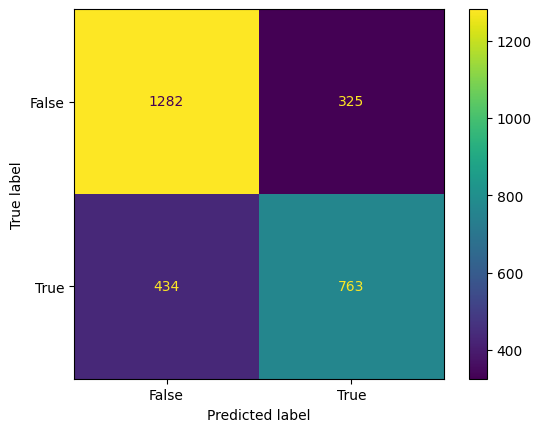

In [117]:
# predict on the test set
y_pred = model_LogR.predict(X_test)

# calculate accuracy using accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of Logistic Regression is:", accuracy)

# generate confusion matrix
confn_matrix = confusion_matrix(y_test, y_pred)

# display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=confn_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()


#### Confusion Matrix Breakdown:

- **True Negative (TN)**: 1282 instances where the model correctly predicted customers would not make a purchase.
  
- **False Positive (FP)**: 325 instances where the model incorrectly predicted customers would make a purchase.

- **False Negative (FN)**: 434 instances where the model incorrectly predicted customers would not make a purchase when they actually did.

- **True Positive (TP)**: 763 instances where the model correctly predicted customers would make a purchase.


In [118]:
# Defining the target names and displaying the classification report of the model.
target_names = ['Not likely purchased new product', 'Purchased new product']
print(classification_report(y_test, y_pred, target_names=target_names))

                                  precision    recall  f1-score   support

Not likely purchased new product       0.75      0.80      0.77      1607
           Purchased new product       0.70      0.64      0.67      1197

                        accuracy                           0.73      2804
                       macro avg       0.72      0.72      0.72      2804
                    weighted avg       0.73      0.73      0.73      2804



#### Classification Report Summary:

**Precision:**
- Not likely to purchase: 75% of these predictions were correct.
- Likely to purchase: 70% of these predictions were correct.

**Recall:**
- Not likely to purchase: Identified 80% of actual non-purchases.
- Likely to purchase: Identified 64% of actual purchases.

**F1-score:**
- Indicates the balance of precision and recall. Higher is better.
- Not likely to purchase: F1-score is 0.77.
- Likely to purchase: F1-score is 0.67.

**Accuracy:** Overall, the model accurately predicted 73% of outcomes.

**Macro Avg:** Average performance across both classes is 0.72.

**Weighted Avg:** Average performance accounting for class sizes is 0.73.


In [119]:
# examine the model coefficients for the explanatory variables
print(predictors)
model_LogR.coef_

['age', 'lor_M', 'prod_A', 'prod_B', 'type_A_0', 'type_A_3', 'type_A_6', 'type_B_0', 'type_B_3', 'type_B_6', 'type_B_9']


array([[ 0.04759381,  0.03303419,  0.22012503, -1.99413192, -1.17528952,
        -1.00310577,  1.2232308 ,  1.03896743,  0.71230011, -1.30387538,
        -1.40255664]])

In [120]:
# generate predictions for the test data using our new model
y_predict = model_LogR.predict(X_test)
y_predict[:10]

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0])

The 'y_predict' array contains predictions that answer the question: **"Whether or not a customer is likely to purchase an additional product."**

## Random Forest

Accuracy of Random Forest Algorithm is: 0.7403708987161198


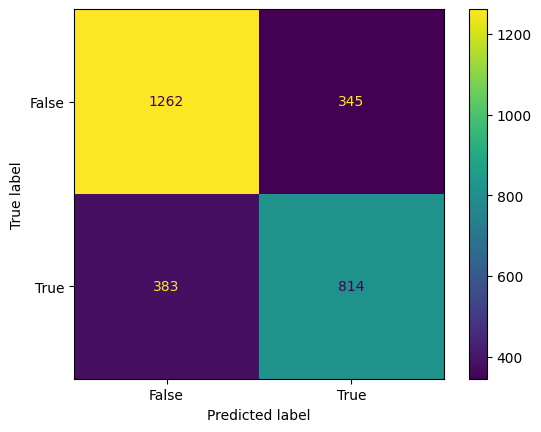

In [121]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest classifier
model_RDF = RandomForestClassifier(n_estimators=100, random_state=42)
model_RDF.fit(X_train, y_train)

# Predict on test set
y_pred = model_RDF.predict(X_test)
y_prob = model_RDF.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Confusion matrix for Random Forest
confn_matrix = metrics.confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Displaying the accuracy of the model.
print("Accuracy of Random Forest Algorithm is:", accuracy)

# Displaying the confusion matrix of the model.
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confn_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()




#### Confusion matrix breakdown:

- **True Negative (TN)**: 1262 instances where the model correctly predicted customers would not make a purchase.
  
- **False Positive (FP)**: 345 instances where the model incorrectly predicted customers would make a purchase.

- **False Negative (FN)**: 383 instances where the model incorrectly predicted customers would not make a purchase when they actually did.

- **True Positive (TP)**: 814 instances where the model correctly predicted customers would make a purchase.


In [122]:
# Defining the target names and displaying the classification report of the model.
target_names = ['Not likely purchased new product', 'Purchased new product']
print(classification_report(y_test, y_pred, target_names=target_names))

                                  precision    recall  f1-score   support

Not likely purchased new product       0.77      0.79      0.78      1607
           Purchased new product       0.70      0.68      0.69      1197

                        accuracy                           0.74      2804
                       macro avg       0.73      0.73      0.73      2804
                    weighted avg       0.74      0.74      0.74      2804



#### Classification Report Summary:

 **Precision:**

+ Not likely to purchase: 77% of these predictions were correct.
+ Likely to purchase: 70% of these predictions were correct.

**Recall:**
+ Not likely to purchase: Identified 79% of actual non-purchases.
+ Likely to purchase: Identified 68% of actual purchases.

**F1-score:**
+ Indicates the balance of precision and recall. Higher is better.
+ Not likely to purchase: F1-score is 0.78.
+ Likely to purchase: F1-score is 0.69.

**Accuracy:** Overall, the model accurately predicted 74% of outcomes.

**Macro Avg:** Average performance across both classes is 0.73.

**Weighted Avg:** Average performance accounting for class sizes is 0.74.



In [123]:
# Predictions for the test data using our new model
y_predict = model_RDF.predict(X_test)
y_predict[:10]

array([0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

The 'y_predict' array contains predictions that answer the question: **"Whether or not a customer is likely to purchase an additional product."**

In [124]:
# Acquiring feature importances from the Random Forest model
feature_importances = model_RDF.feature_importances_

# Mapping the feature names to their importances
feature_importance_dict = dict(zip(predictors, feature_importances))

# Feature importances
feature_importance_dict

{'age': 0.5935332535785999,
 'lor_M': 0.12014336566145455,
 'prod_A': 0.021136404232516896,
 'prod_B': 0.0840573678776132,
 'type_A_0': 0.02414638118542805,
 'type_A_3': 0.029122448887269253,
 'type_A_6': 0.0015343159556195462,
 'type_B_0': 0.09844090767177825,
 'type_B_3': 0.016048383883510473,
 'type_B_6': 0.010778193997641579,
 'type_B_9': 0.0010589770685684073}

**Feature importance** in a random forest algorithm helps us understand which features are most useful for building the machine learning model.

### Logistic Regression Coefficients

- Age (0.0475938): Indicates a positive relationship with the likelihood of purchasing new products. Older customers are more likely to purchase more.

- Length of Relationship (lor_M) (0.03303419): It shows a positive relationship, suggesting that a longer relationship with the company increases the likelihood of new purchases.

- Product A (prod_A, 0.22012492): Positive coefficient, indicating that customers who have purchased Product A are more likely to make new purchases.

- Product B (prod_B, -1.99413172): Negative coefficient, suggesting that customers with Product B are much less likely to purchase new products.

- Type A_0 (-1.17528931): Negative influence, suggesting that customers purchasing this category are less likely to buy new products.

- Type A_3 (-1.00310525): Negative influence, suggesting that customers purchasing this category are less likely to buy new products, it has a negative impact but is slightly less potent.

- Type A_6 (1.22323016): Positive influence, indicating customers purchasing this category are significantly more likely to purchase new products.

- Type B_0 (1.03896732): Positive influence, indicating customers purchasing this category are significantly more likely to purchase new products.

- Type B_3 (0.71229956): Positive influence, indicating an increased likelihood of new purchases, though less than Type B_0.

- Type B_6 (-1.30387548): Negative coefficient, there is a decrease in the likelihood of a customer purchasing new products if they purchase this category products.

- Type B_9 (-1.40255579): Strongly negative, there is a decrease in the likelihood of a customer purchasing new products if they purchase this category products.

### Random Forest Feature Importances

- Age (0.5935332535785999): This is the highest importance score. Different age groups might have varying needs or preferences, influencing their likelihood to purchase new products.

- Length of Relationship (LOR_m) (0.12014336566145455): A longer relationship might mean the customer feels satisfied with the brand and is more open to buying additional products.

- Type B_0 (0.09844090767177825): This score indicates that the specific category of Type B_0 has a significant impact on the likelihood of new purchases.

- Product B (0.0840573678776132): Indicates that prior purchase of Product B is that satisfaction with Product B influences the decision to purchase new products.

- Type A_3 (0.029122448887269253): Lesser importance compared to top predictors but still relevant.

- Type A_0 (0.02414638118542805): Slightly less important than Type A_3, indicating different attributes of Product A influence buying behavior to various extents.

- Product A (0.021136404232516896): Relatively low importance, suggesting that simply having Product A does not have a strong predictive power on new purchases compared to other variables.

- Type B_3 (0.016048383883510473): Low importance, indicating that this category has minimal impact on the predictive model.

- Type B_6 (0.010778193997641579): Very low importance, suggesting minor influence in the model's decision-making process.

- Type B_9 (0.0010589770685684073): The least importance score, indicating negligible impact on the likelihood of making new purchases.



# Cross Validation & Stratified Logistic Regression



In [125]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold, cross_val_score

In [126]:
X = df_T[predictors]

In [127]:
y = df_T["TARGET"]

In [128]:
# Object Design
model_LR = LogisticRegression(max_iter = 1500)

In [129]:
# Simple Kfold
Kfold = KFold(n_splits=10, random_state=42, shuffle=True)

# Perform three task togather fit, split and performance measurement
Kfold_scores = cross_val_score(model_LR, X, y, scoring='accuracy', cv=Kfold, n_jobs=-1)

#Evaluate models
print(Kfold_scores)

#Report Performance
print("Accuracy: Mean %.3f & Std %3f" % (np.mean(Kfold_scores), np.std(Kfold_scores)))

[0.7211127  0.72824536 0.7125535  0.72610556 0.69044223 0.72467903
 0.72305496 0.71663098 0.71377587 0.70806567]
Accuracy: Mean 0.716 & Std 0.010651


In [130]:
# Stratified K-fold
S_kfold= StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

#Perform three task togather fit, split and performance measurement
S_kfold_scores = cross_val_score(model_LR, X, y, scoring='accuracy', cv=S_kfold, n_jobs=-1)


#Evaluate models
print(S_kfold_scores)

#Report Performance
print("Accuracy: Mean %.3f & Std %3f" % (np.mean(S_kfold_scores), np.std(S_kfold_scores)))

[0.7232525  0.71611983 0.7253923  0.72253923 0.7296719  0.69828816
 0.71877231 0.72162741 0.70378301 0.71948608]
Accuracy: Mean 0.718 & Std 0.009215


# Cross Valiation & Stratified Random Forest

In [131]:
#object Design
model_RF = RandomForestClassifier()

In [132]:
# Simple Kfold
kfold = KFold(n_splits=10, random_state=42, shuffle=True)

#Perform three task togather fit, split and performance measurement
kfold_scores = cross_val_score(model_RF, X, y, scoring='accuracy', cv=kfold, n_jobs=-1)

#Evaluate Models
print(kfold_scores)

#Report Performance
print("Accuracy: Mean %.3f & Std %3f" % (np.mean(kfold_scores), np.std(kfold_scores)))

[0.74179743 0.74322397 0.7446505  0.74607703 0.71968616 0.7339515
 0.73875803 0.72876517 0.73233405 0.74446824]
Accuracy: Mean 0.737 & Std 0.008117


In [133]:
# Stratified Kfold
Skfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

#Perform three task togather fit, split and performance measurement
skfold_scores = cross_val_score(model_RF, X, y, scoring='accuracy', cv=Skfold, n_jobs=-1)

#Evaluate models
print(skfold_scores)

#Report Performance
print("Accuracy: Mean %.3f & Std %3f" % (np.mean(skfold_scores), np.std(skfold_scores)))

[0.74964337 0.7467903  0.72824536 0.73965763 0.73680456 0.73038516
 0.73162027 0.73875803 0.72448251 0.74375446]
Accuracy: Mean 0.737 & Std 0.007858


## Customer Purchase Prediction: Model Comparison and KFold Analysis

The present report outlines the outcomes of a project intended to build an optimal customer habit model to anticipate the probability of future purchases by existing customers. The fundamental objective is to facilitate targeted marketing initiatives to enhance revenue, customer retention, and sales strategies.

The report analyzes the performance of two models - the Random Forest and Logistic Regression - in predicting customer purchasing patterns. Additionally, it explores the application of KFold cross-validation to assess model generalizability.


#### Model Performance Comparison:

- __Random Forest:__ Achieved an overall accuracy of 0.7403. This indicates good performance, correctly classifying approximately 74% of the instances. However, KFold cross-validation with 10 splits resulted in slightly lower accuracies: 0.738 (simple) and 0.737 (stratified).


- __Logistic Regression:__ Achieved an overall accuracy of 0.719. This is lower than Random Forest, suggesting it might not capture the underlying relationships in the data as effectively. KFold cross-validation yielded similar accuracies: 0.716 (simple) and 0.718 (stratified).

#### KFold Cross-Validation:

KFold cross-validation is a technique used to estimate a model's performance on unseen data. Here's why it was applied:

- __Overall accuracy can be misleading:__ The initial accuracy (before KFold) reflects the model's performance on the specific training data used. KFold helps assess how well the model generalizes to new, unseen data.

- __Reduces overfitting risk:__ Overfitting occurs when a model memorizes the training data too well, leading to poor performance on new data. KFold helps mitigate this by training and testing the model on different subsets of the data.

### Approach and Achievements

The approach involved:

- Training both Random Forest and Logistic Regression models on the entire dataset.
- Evaluating the initial accuracy (without KFold).
- Applying KFold cross-validation with 10 splits.
- Splitting the data into 10 folds.
- Training the model on 9 folds and testing it on the remaining fold.
- Repeating this process 10 times, ensuring all data points are used for both training and testing.
- Analyzing the KFold accuracy (simple and stratified) to assess model generalizability.

### Key Achievements

- Identified that both models perform well on the initial data but might struggle with unseen data (based on the decrease in accuracy after KFold).

- Provided a more robust estimate of model performance through KFold cross-validation.


#### Recommendations:
After conducting an analysis, it is recommended to explore techniques that can help improve the generalizability of the model. For Random Forest, it is recommended to try hyperparameter tuning, feature importance analysis, and alternative regularization techniques to address any potential overfitting. In the case of Logistic Regression, exploring techniques like polynomial features can help capture non-linear relationships in the data, potentially improving its performance. By refining the models and exploring other algorithms, we can aim to achieve a more accurate and generalizable model for predicting customer purchasing behavior.


#### Conclusion:

In terms of overall accuracy, the Random Forest algorithm outperformed the Logistic Regression algorithm. Nonetheless, both models could benefit from further optimization to improve their generalizability. The choice of the best model depends on the specific objectives of the project. If understanding the factors influencing purchasing behavior is a crucial aspect, the Logistic Regression algorithm may be preferred due to its interpretability. On the other hand, if maximizing prediction accuracy is the primary objective, further refinement of the Random Forest algorithm is recommended.

## References
 - Violinplots : https://seaborn.pydata.org/generated/seaborn.violinplot.html

 - Logistic Regression : https://www.datacamp.com/tutorial/understanding-logistic-regression-python

 - Random Forest : https://www.w3schools.com/python/python_ml_confusion_matrix.asp

 - Cross Validations : https://towardsdatascience.com/what-is-stratified-cross-validation-in-machine-learning-8844f3e7ae8e